In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

H1_hESC_GC = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/ATACseq/raw_data/peak_calling/H1_hESC_peaks_not_in_Th1_Th17.ATACseq.UnionPeakSet.GC_content.txt', sep='\t')
Th_GC = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/ATACseq/combined_ATAC_peaks.GC_content.txt', sep='\t')

H1_hESC_GC['peak'] = H1_hESC_GC['#1_usercol']+'_'+H1_hESC_GC['2_usercol'].astype('str')+'_'+H1_hESC_GC['3_usercol'].astype('str')
H1_hESC_GC.rename(columns={'5_pct_gc':'GC_content'}, inplace=True)
H1_hESC_GC['GC_content'] = H1_hESC_GC['GC_content']*100
H1_hESC_GC['type']='negative_control'
H1_hESC_GC_subset = H1_hESC_GC[['peak','GC_content','type']]

Th_GC['peak'] = Th_GC['#1_usercol']+'_'+Th_GC['2_usercol'].astype('str')+'_'+Th_GC['3_usercol'].astype('str')
Th_GC.rename(columns={'7_pct_gc':'GC_content'}, inplace=True)
Th_GC['GC_content'] = Th_GC['GC_content']*100
Th_GC['type']='target_library'
Th_GC_subset = Th_GC[['peak','GC_content','type']]

plt.figure(figsize=(10,8))
plt.hist(H1_hESC_GC_subset['GC_content'], bins=100, alpha=0.5, label="negative_control")
count_Th, bins_Th, patches_Th = plt.hist(Th_GC_subset['GC_content'], bins=100, alpha=0.5, label="target_library")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()

In [ ]:
import random 
import numpy as np
import pandas as pd

random.seed(42)

count_hESC, bin_edge = np.histogram(H1_hESC_GC_subset['GC_content'], bins = bins_Th)

def random_sample(count_df1, count_df2, bin_size):
    m = [0]
    if (count_df1[bin_size]>=int(count_df2[bin_size]) and (count_df2[bin_size]!=0)):
        m = list(random.sample(range(0, count_df1[bin_size]), int(count_df2[bin_size])))
        
    elif (count_df1[bin_size]<int(count_df2[bin_size]) and (count_df1[bin_size]!=0)):
        range_list = list(range(0, count_df1[bin_size]))
        m = list(np.random.choice(range_list, size=int(count_df2[bin_size])))
        
    elif (count_df1[bin_size]==int(count_df2[bin_size]) and (count_df1[bin_size]!=0)):
        m = list(range(0, count_df1[bin_size]))
    
    return m 


df=None
for i in range(0,100):
    bin_start = bins_Th[i]
    bin_stop = bins_Th[i+1]
    H1_hESC_GC_subset_v1 = H1_hESC_GC_subset[(H1_hESC_GC_subset['GC_content']>=bin_start)&(H1_hESC_GC_subset['GC_content']<bin_stop)].reset_index()
    H1_hESC_GC_subset_v1.drop(columns='index', inplace=True)

    if not H1_hESC_GC_subset_v1.empty:
        sample_size = random_sample(count_hESC, count_Th, i)
        H1_hESC_GC_random = H1_hESC_GC_subset_v1.loc[sample_size]
        if df is None:
            df = H1_hESC_GC_random
        else:
            df = pd.concat([df,H1_hESC_GC_random])  




    
plt.figure(figsize=(10,8))
plt.hist(df['GC_content'], bins=100, alpha=0.5, label="negative_control")
plt.hist(Th_GC_subset['GC_content'], bins=100, alpha=0.5, label="target_library")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()



In [1]:
import pandas as pd

In [ ]:
import random 
import numpy as np
import pandas as pd

random.seed(42)

count_hESC, bin_edge = np.histogram(H1_hESC_GC_subset['GC_content'], bins = bins_Th)

### function to match distribution of df2 to that of df1 
# def random_sample(count_df1, count_df2, n_bin):
#     for i in range(0, n_bin):
# #         bin_start = count_df1[i]
# #         bin_stop = count_df1[i+1]
#         m = [0]
#         if (count_df1[i]>count_df2[i] and count_df2[i]!=0):
#             m = list(range(0, count_df2[i]))
        
#         elif (count_df1[i]<count_df2[i] and count_df1[i]!=0):
#             m = list(random.sample(range(0, count_df2[i]), count_df1[i]))

#         elif (count_df1[i]>count_df2[i] and count_df2[i]==0):
#             count_df2[bin_size+1] = count_df2[bin_size+1]+count_df1
#             continue
        
#         elif (count_df1[i]<count_df2[i] and count_df1[i]==0):
#             m = [0]
        
#         elif (count_df1[i]==count_df2[i] and count_df2[i]!=0):
#             m = list(range(0, count_df2[i]))
    
#     return m 

df=None
m = 0
for i in range(0,100):
    bin_start = bins_Th[i]
    bin_stop = bins_Th[i+1]
    H1_hESC_GC_subset_v1 = H1_hESC_GC_subset[(H1_hESC_GC_subset['GC_content']>=bin_start)&(H1_hESC_GC_subset['GC_content']<bin_stop)].reset_index()
    H1_hESC_GC_subset_v1.drop(columns='index', inplace=True)
    count_Th = count_Th.astype(int)
    print(count_Th[i])
    print(count_hESC[i])
    print(H1_hESC_GC_subset_v1)
    
    if (count_Th[i]>count_hESC[i] and count_hESC[i]!=0):
        m = list(range(0, count_hESC[i]))
        
    elif (count_Th[i]<count_hESC[i] and count_Th[i]!=0):
        m = random.sample(range(0, count_hESC[i]), count_Th[i])

    elif (count_Th[i]>count_hESC[i] and count_hESC[i]==0 and i!=99):
        count_hESC[i+1] = count_hESC[i+1]+count_Th[i]
        continue
        
    elif (count_Th[i]<count_hESC[i] and count_Th[i]==0):
        continue
        
    elif (count_Th[i]==count_hESC[i] and count_hESC[i]!=0):
        m = list(range(0, count_hESC[i]))

    if not H1_hESC_GC_subset_v1.empty:
        H1_hESC_GC_random = H1_hESC_GC_subset_v1.loc[m]
        if df is None:
            df = H1_hESC_GC_random
        else:
            df = pd.concat([df,H1_hESC_GC_random])  




    
plt.figure(figsize=(10,8))
plt.hist(df['GC_content'], bins=100, alpha=0.5, label="negative_control")
plt.hist(Th_GC_subset['GC_content'], bins=100, alpha=0.5, label="target_library")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()



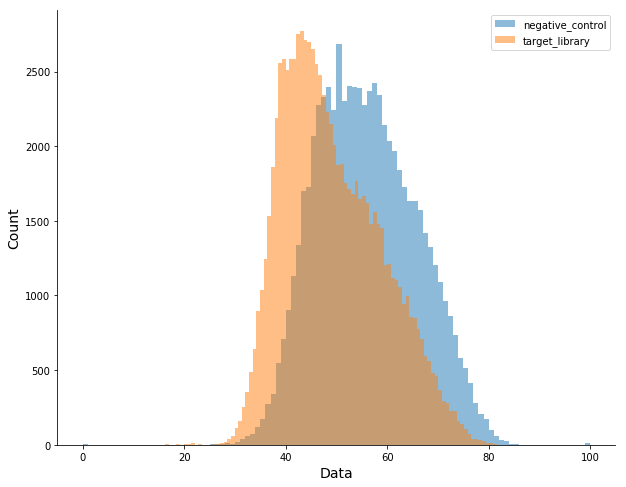

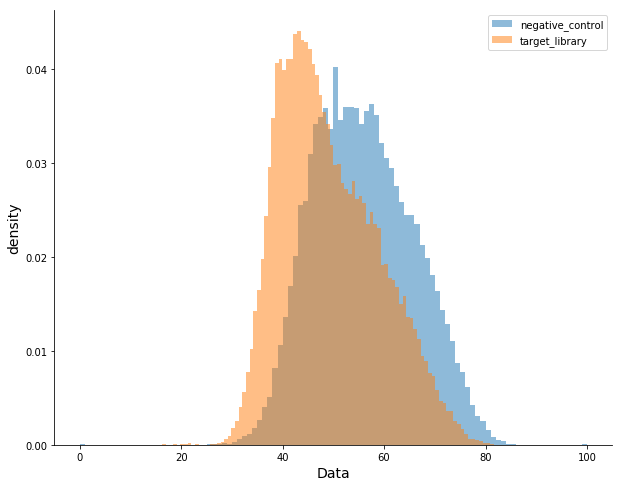

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

H1_hESC_GC = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/ATACseq/raw_data/peak_calling/h1_hESC_rep1_rep2_UnionPeakSet_peaks_not_in_Th1_Th17.ATACseq.GC_content.txt', sep='\t')
Th_GC = pd.read_csv('/data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/ATACseq/combined_ATAC_peaks.GC_content.txt', sep='\t')

H1_hESC_GC['peak'] = H1_hESC_GC['#1_usercol']+'_'+H1_hESC_GC['2_usercol'].astype('str')+'_'+H1_hESC_GC['3_usercol'].astype('str')
H1_hESC_GC.rename(columns={'12_pct_gc':'GC_content'}, inplace=True)
H1_hESC_GC['GC_content'] = H1_hESC_GC['GC_content']*100
H1_hESC_GC['type']='negative_control'
H1_hESC_GC_subset = H1_hESC_GC[['peak','GC_content','type']]

Th_GC['peak'] = Th_GC['#1_usercol']+'_'+Th_GC['2_usercol'].astype('str')+'_'+Th_GC['3_usercol'].astype('str')
Th_GC.rename(columns={'7_pct_gc':'GC_content'}, inplace=True)
Th_GC['GC_content'] = Th_GC['GC_content']*100
Th_GC['type']='target_library'
Th_GC_subset = Th_GC[['peak','GC_content','type']]

plt.figure(figsize=(10,8))
plt.hist(H1_hESC_GC_subset['GC_content'], bins=100, alpha=0.5, label="negative_control")
count_Th, bins_Th, patches_Th = plt.hist(Th_GC_subset['GC_content'], bins=100, alpha=0.5, label="target_library")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')
sns.despine()

plt.figure(figsize=(10,8))
plt.hist(H1_hESC_GC_subset['GC_content'],density=True, bins=100, alpha=0.5, label="negative_control")
plt.hist(Th_GC_subset['GC_content'],density=True, bins=100, alpha=0.5, label="target_library")
plt.xlabel("Data", size=14)
plt.ylabel("density", size=14)
plt.legend(loc='upper right')
sns.despine()

plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def distance(a,b):
    return np.sum((a-b)**2)

def resample(A, B, N):
    newsample = np.zeros((N,2))
    for i in range(N):
        # step 1
        a = A[np.random.randint(0,len(A))]
        #step 2
        mindist = np.inf
        mindistind = None
        for j in range(len(B)):
            d = distance(a,B[j])
            if d < mindist:
                mindist = d
                mindistind = j
        newsample[i]=B[mindistind]
    return newsample

C = resample(Th_GC_subset['GC_content'], H1_hESC_GC_subset['GC_content'], 1600)

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True)
ax1.scatter(Th_GC_subset['GC_content'][:,0], Th_GC_subset['GC_content'][:,1], label='Th_GC_subset')
ax2.scatter(H1_hESC_GC_subset['GC_content'][:,0], Th_GC_subset['GC_content'][:,1], label='H1_hESC_GC_subset')
ax3.scatter(C[:,0], C[:,1], label='H1_hESC_GC_subset from Th_GC_subset')
[ax.legend() for ax in (ax1, ax2, ax3)]
plt.show()

KeyboardInterrupt: 